In [35]:
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generating Synthetic data for 100 trials

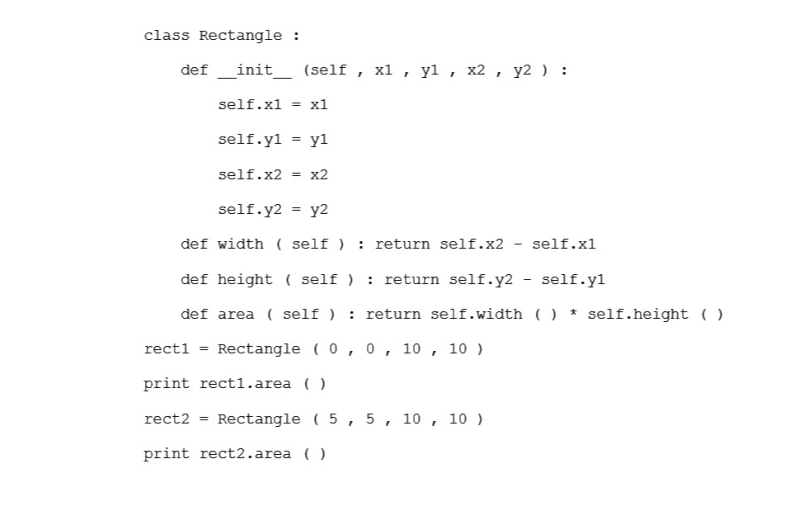

In [36]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='code_snippet.png')
img

In [37]:
# Importing all the required stuff
import emip_toolkit as EMTK
import correction
import json
import os
import numpy as np
import drift_algorithms_osf as algo
import algorithms as best_algs
from tqdm import tqdm
import statistics
# Importing the correction_mode_of_disparities function from the ModeOfDisparities folder and the __init__.py file
from Algorithms.ModeOfDisparities import correction_mode_of_disparities

In [38]:
# Helper functions
def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [39]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png
...,...,...,...,...,...,...,...
89,sub-line,line 12 part 12,475.5,410,10,21,code_snippet.png
90,sub-line,line 13 part 1,141.5,444,51,22,code_snippet.png
91,sub-line,line 13 part 2,197.5,444,97,22,code_snippet.png
92,sub-line,line 13 part 3,302.5,444,9,22,code_snippet.png


In [40]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png,class
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png,Rectangle
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png,:
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png,def
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png,__init__


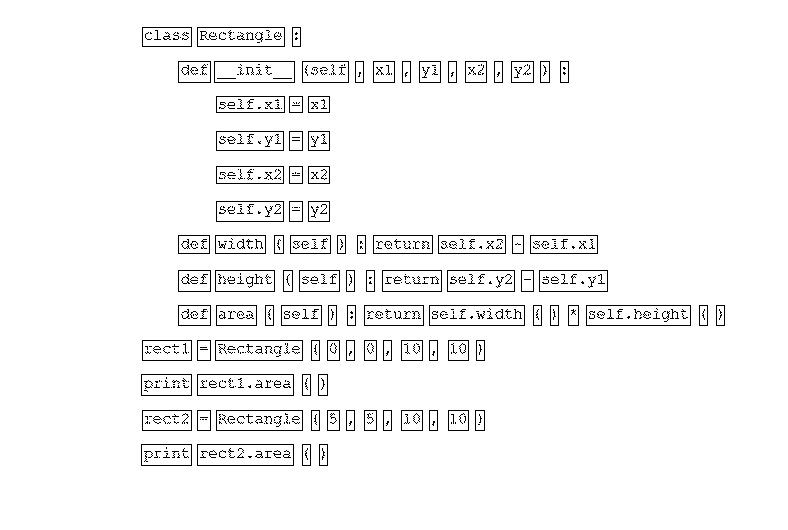

In [41]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

[[314.8333333333333, 203.5, 100], [161.16666666666666, 422.5, 250], [303.1666666666667, 178.0, 50], [291.1666666666667, 182.0, 50], [464.1666666666667, 246.5, 350], [297.1666666666667, 106.5, 50], [505.5, 71.0, 100], [306.8333333333333, 170.0, 100], [475.1666666666667, 282.0, 350], [227.5, 287.0, 300], [347.5, 415.5, 50], [322.8333333333333, 175.0, 100], [197.16666666666666, 425.5, 50], [478.1666666666667, 288.0, 350], [229.5, 279.0, 300], [340.5, 429.5, 50], [453.1666666666667, 251.5, 350], [388.5, 234.5, 300], [231.16666666666666, 147.0, 350], [224.16666666666666, 306.5, 200], [464.5, 313.5, 500], [487.5, 66.0, 100], [235.83333333333334, 341.5, 450], [469.1666666666667, 251.5, 350], [298.1666666666667, 185.0, 50], [370.8333333333333, 73.0, 50], [248.5, 74.0, 400], [535.8333333333334, 66.0, 100], [237.83333333333334, 353.5, 450], [190.5, 64.0, 150], [155.16666666666666, 343.5, 250], [297.1666666666667, 235.5, 200], [237.5, 280.0, 300], [310.8333333333333, 97.5, 100], [230.833333333333

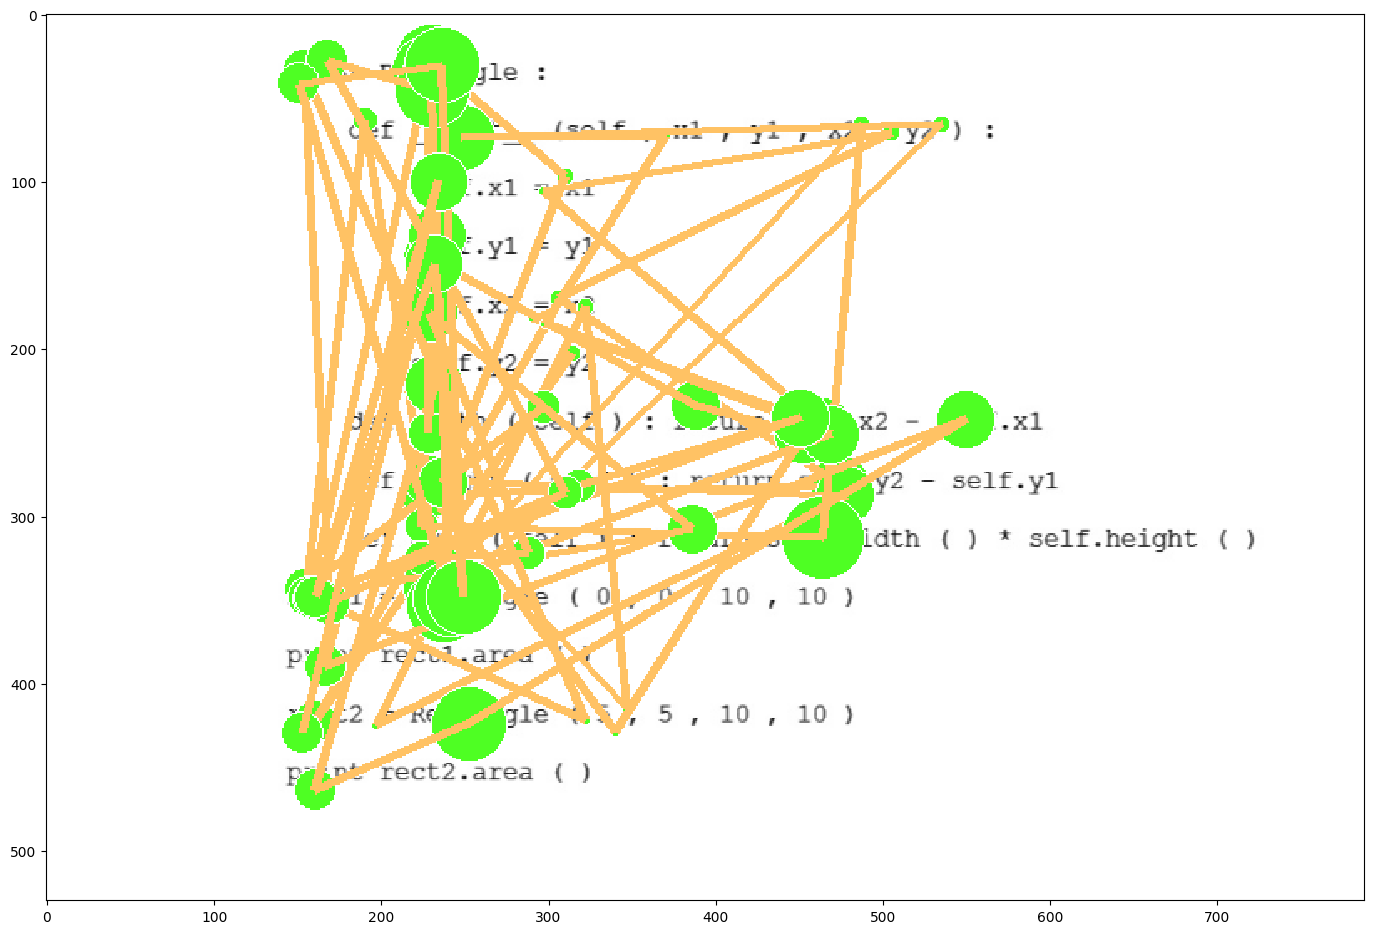

In [42]:
# generating a synthetic trial
synth_fixations = correction.generate_fixations_code(aois_with_tokens)
print(synth_fixations)

# drawing the synthetic data!
correction.draw_fixation('code_snippet.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

In [43]:
data = {}

# loop 100 times maintaining a variable called index
for index in range(100):

    # generate a synthetic trial using similar code to the one above
    
    synth_fixations = correction.generate_fixations_code(aois_with_tokens)
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    data["robot" + str(index)] = synth_fixations
    

In [44]:
# check that the data looks correct

data["robot1"]

[[155.16666666666666, 420.5, 250],
 [237.5, 428.5, 450],
 [236.5, 272.0, 300],
 [164.5, 462.0, 250],
 [192.16666666666666, 247.5, 150],
 [392.5, 243.5, 300],
 [222.16666666666666, 316.5, 200],
 [697.5, 310.5, 50],
 [155.5, 450.0, 250],
 [377.8333333333333, 74.0, 50],
 [231.5, 82.0, 400],
 [244.5, 68.0, 400],
 [301.1666666666667, 237.5, 200],
 [545.1666666666666, 253.5, 350],
 [241.16666666666666, 212.5, 350],
 [348.5, 420.5, 50],
 [314.1666666666667, 247.5, 200],
 [469.1666666666667, 287.0, 350],
 [216.83333333333334, 29.0, 450],
 [237.16666666666666, 139.0, 350],
 [287.1666666666667, 181.0, 50],
 [243.5, 80.0, 400],
 [153.5, 387.0, 250],
 [236.16666666666666, 135.0, 350],
 [243.5, 78.0, 400],
 [167.5, 375.0, 250],
 [148.5, 378.0, 250],
 [435.5, 340.5, 50],
 [233.5, 82.0, 400],
 [236.5, 271.0, 300],
 [216.83333333333334, 29.0, 450],
 [235.5, 114.5, 350],
 [316.8333333333333, 172.0, 100],
 [556.1666666666666, 243.5, 350],
 [228.83333333333334, 385.0, 500],
 [463.1666666666667, 280.0, 35

In [45]:
# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"

# Check if the file already exists
# If it does, skip this step
if not os.path.exists("synthetic_dataset_with_time.txt"):
    # Open a file for writing
    synthetic_dataset_with_time = open("synthetic_dataset_with_time.txt", "w")

    # Save the dictionary into this file
    # (the 'indent=4' is optional, but makes the json file more readable)
    json.dump(data, synthetic_dataset_with_time, indent=4)

    # Close the file
    synthetic_dataset_with_time.close()

    # check that the file looks correct
    synthetic_dataset_with_time = open("synthetic_dataset_with_time.txt", "r")

    print(synthetic_dataset_with_time.read())



# GENERATING ERRORS

In [46]:
# open the generated synthetic data file and read it as a python dictionary called data

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

In [47]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()


import correction

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

In [48]:
synth = correction.generate_fixations_code(aois_with_tokens)

# Universal Function for comparing algorithm statistics for different kinds of errors

In [49]:
# Creating a function out of all the code below
def synthetic_error_analysis(error_type, iterations):

    # create empty lists to store results
    attach_results = [[],[],[],[],[],[],[],[],[],[],[]]
    regress_results = [[],[],[],[],[],[],[],[],[],[],[]]
    warp_results = [[],[],[],[],[],[],[],[],[],[],[]]
    cluster_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_results = [[],[],[],[],[],[],[],[],[],[],[]]
    merge_results = [[],[],[],[],[],[],[],[],[],[],[]]
    segment_results = [[],[],[],[],[],[],[],[],[],[],[]]
    split_results = [[],[],[],[],[],[],[],[],[],[],[]]
    stretch_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_fix_num_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_line_length_results = [[],[],[],[],[],[],[],[],[],[],[]]
    fix_align_results = [[],[],[],[],[],[],[],[],[],[],[]]
    mode_of_disparities_results = [[],[],[],[],[],[],[],[],[],[],[]]
    #hill_climb_results = [[],[],[],[],[],[],[],[],[],[],[]]
    optimal_noise_results = [[],[],[],[],[],[],[],[],[],[],[]]
    optimal_slope_results = [[],[],[],[],[],[],[],[],[],[],[]]
    optimal_shift_results = [[],[],[],[],[],[],[],[],[],[],[]]
    optimal_offset_results = [[],[],[],[],[],[],[],[],[],[],[]]

    file = open('synthetic_dataset_with_time.txt', 'r')
    text = file.read()
    data = json.loads(text)

    word_centers = correction.find_word_centers(aoi)
    word_centers = np.array(word_centers.copy(), dtype=int)

    duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
    duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

    image_path = "./"
    image = "code_snippet.png"
    aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
    aoi_lines = EMTK.find_aoi(image, image_path, level="line")

    # Creating a sample lsit to store an array of an array of words where each index represents a line
    words_sorted_by_line = []

    for i in range(len(aoi_lines)):
        words_sorted_by_line.append([])

    # Looping through the words and appending them to the correct line
    for i in range(len(aoi_words)):
        word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
        # Appending the x and y coordinates of the word to the correct line
        words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])


    # MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
    for robot_index in tqdm(range(iterations)):
        
        for error_probability in range(0, 11):
            error_test = []
            # generate error based on the error type
            if error_type == "noise":
                error_test = correction.error_noise(error_probability/10, 30, error_probability/10, data['robot' + str(robot_index)].copy())
            elif error_type == "slope":
                slope = slope = -0.125 + (error_probability * 0.025)
                error_test = correction.error_slope(slope, data['robot' + str(robot_index)].copy())
            elif error_type == "shift":
                shift = -0.25 + error_probability * 0.05
                error_test = correction.error_shift(shift, data['robot' + str(robot_index)].copy(), aoi_lines)
            elif error_type == "within_line_regression":
                error_test, data['robot' + str(robot_index)] = correction.error_within_line_regression(error_probability/10, data['robot' + str(robot_index)].copy(), words_sorted_by_line, aoi_lines)
            elif error_type == "between_line_regression":
                error_test = correction.error_between_line_reg(error_probability/10, data['robot' + str(robot_index)].copy())
            elif error_type == "offset":
                error_test = correction.error_offset(error_probability/10, error_probability/10, data['robot' + str(robot_index)].copy())
                
            
            # hill_climbing correction - 5
            np_array = np.array(error_test.copy())
            '''
            clusters = best_algs.make_cluster_refactor(np.array(synth))
            print("HIIIIII", clusters)
            corrections = best_algs.correct_cluster(clusters, aois_with_tokens)
            print("DONE", corrections)
        
            percentage, match_list = correction.correction_quality(aoi, synth_fixations, corrections)
            hill_climb_results[error_probability].append(percentage)
            '''
            
            # attach correction - 1
            np_array = np.array(error_test.copy())
            attach_correction = algo.attach(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), attach_correction)
            attach_results[error_probability].append(percentage)
            
            # regress correction - 3
            np_array = np.array(error_test.copy())
            regress_correction = algo.regress(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), regress_correction)
            regress_results[error_probability].append(percentage)
            
            # warp correction - 4
            np_array = np.array(error_test.copy(), dtype=int)
            durations = np.delete(np_array, 0, 1)
            durations = np.delete(durations, 0, 1)
            np_array = np.delete(np_array, 2, 1)
            
            warp_correction = algo.warp(np_array, word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
            warp_results[error_probability].append(percentage)

            if percentage < 1:
                # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
                print("robot:", robot_index, "    error probability:", error_probability)

            # cluster correction - 5
            np_array = np.array(error_test.copy())
            cluster_correction = algo.cluster(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), cluster_correction)
            cluster_results[error_probability].append(percentage)

            # compare correction - 6 
            np_array = np.array(error_test.copy())
            compare_correction = algo.compare(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_correction)
            compare_results[error_probability].append(percentage)

            # merge correction - 7
            np_array = np.array(error_test.copy())
            merge_correction = algo.merge(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), merge_correction)
            merge_results[error_probability].append(percentage)

            # segment correction - 8
            np_array = np.array(error_test.copy())
            segment_correction = algo.segment(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), segment_correction)
            segment_results[error_probability].append(percentage)

            # split correction - 9
            np_array = np.array(error_test.copy())
            split_correction = algo.split(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), split_correction)
            split_results[error_probability].append(percentage)

            # stretch correction - 10
            np_array = np.array(error_test.copy())
            stretch_correction = algo.stretch(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), stretch_correction)
            stretch_results[error_probability].append(percentage)

            # compare by fixation number - 11
            np_array = np.array(error_test.copy())
            compare_fix_number_correction = algo.compare_fixnum(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_fix_number_correction)
            compare_fix_num_results[error_probability].append(percentage)

            # Compare by line length - 12
            np_array = np.array(error_test.copy())
            compare_line_length_correction = algo.compare_line_len(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_line_length_correction)
            compare_line_length_results[error_probability].append(percentage)

            # Fix align - 13
            np_array = np.array(error_test.copy())
            fix_align_correction = algo.fix_align(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), fix_align_correction)
            fix_align_results[error_probability].append(percentage)

            # Mode of disparities - 14
            np_array = np.array(error_test.copy())
            mode_of_disparities_correction = correction_mode_of_disparities(np_array, aoi_words)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), mode_of_disparities_correction)
            mode_of_disparities_results[error_probability].append(percentage)

            # Optimal noise - 15
            np_array = np.array(error_test.copy())
            optimal_noise_correction = algo.optimal_noise_model(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), optimal_noise_correction)
            optimal_noise_results[error_probability].append(percentage)

            # Optimal slope - 16
            np_array = np.array(error_test.copy())
            optimal_slope_correction = algo.optimal_slope_model(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), optimal_slope_correction)
            optimal_slope_results[error_probability].append(percentage)

            # Optimal shift - 17
            np_array = np.array(error_test.copy())
            optimal_shift_correction = algo.optimal_shift_model(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), optimal_shift_correction)
            optimal_shift_results[error_probability].append(percentage)

            # Optimal offset - 18
            np_array = np.array(error_test.copy())
            optimal_offset_correction = algo.optimal_offset_model(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), optimal_offset_correction)
            optimal_offset_results[error_probability].append(percentage)

            # Warp with regression - 15
            # np_array = np.array(error_test.copy())
            # warp_correction, data['robot' + str(robot_index)] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot' + str(robot_index)].copy())
            # percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
            # warp_with_regression_results[error_probability].append(percentage)

    mean_attach_results = mean_error_group(attach_results)
    mean_regress_results = mean_error_group(regress_results)
    mean_warp_results = mean_error_group(warp_results)
    mean_cluster_results = mean_error_group(cluster_results)
    mean_compare_results = mean_error_group(compare_results)
    mean_merge_results = mean_error_group(merge_results)
    mean_segment_results = mean_error_group(segment_results)
    mean_split_results = mean_error_group(split_results)
    mean_stretch_results = mean_error_group(stretch_results)
    mean_compare_fix_num_results = mean_error_group(compare_fix_num_results)
    mean_compare_line_length_results = mean_error_group(compare_line_length_results)
    mean_fix_align_results = mean_error_group(fix_align_results)
    mean_mode_of_disparities_results = mean_error_group(mode_of_disparities_results)
    mean_optimal_noise_results = mean_error_group(optimal_noise_results)
    mean_optimal_slope_results = mean_error_group(optimal_slope_results)
    mean_optimal_shift_results = mean_error_group(optimal_shift_results)
    mean_optimal_offset_results = mean_error_group(optimal_offset_results)

    import matplotlib.pyplot as plt
    plt.plot(mean_attach_results, color='Black', linewidth=1, marker='^')
    plt.plot(mean_regress_results, color='Aqua', linewidth=1, marker='s')
    plt.plot(mean_warp_results, color='DarkViolet', linewidth=1, marker='d')
    plt.plot(mean_cluster_results, color='DarkOrange', linewidth=1, marker='p')
    plt.plot(mean_compare_results, color='DarkGreen', linewidth=1, marker='h')
    plt.plot(mean_merge_results, color='DarkRed', linewidth=1, marker='*')
    plt.plot(mean_segment_results, color='DarkBlue', linewidth=1, marker='x')
    plt.plot(mean_split_results, color='DarkCyan', linewidth=1, marker='1')
    plt.plot(mean_stretch_results, color='DarkMagenta', linewidth=1, marker='2')
    plt.plot(mean_compare_fix_num_results, color='DarkGoldenRod', linewidth=1, marker='3')
    plt.plot(mean_compare_line_length_results, color='DarkSlateGray', linewidth=1, marker='4')
    plt.plot(mean_fix_align_results, color='DarkSlateBlue', linewidth=1, marker='8')
    plt.plot(mean_mode_of_disparities_results, color='DarkSlateGrey', linewidth=1, marker='o')
    plt.plot(mean_optimal_noise_results, color='DarkTurquoise', linewidth=1, marker='v')
    plt.plot(mean_optimal_slope_results, color='DarkViolet', linewidth=1, marker='>')
    plt.plot(mean_optimal_shift_results, color='DeepPink', linewidth=1, marker='<')
    plt.plot(mean_optimal_offset_results, color='DeepSkyBlue', linewidth=1, marker='p')

    plt.legend(['attach', 'regress', 'warp', 'cluster', 'compare', 'merge', 'segment', 'split', 'stretch', 'compare_fix_num', 'compare_line_length', "fix_align", "mode_of_disparities", "optimal_noise_model", "optimal_slope_model", "optimal_shift_model", "optimal_offset"], loc='lower right')
    plt.ylabel('Accuracy of algorithmic correction (%))')
    plt.xlabel(error_type + ' distortion')

    print(error_type + " Error Statistics:")
    print("mean attach:", statistics.mean(mean_attach_results))
    print("mean regress:", statistics.mean(mean_regress_results))
    print("mean warp:", statistics.mean(mean_warp_results))
    print("mean cluster:", statistics.mean(mean_cluster_results))
    print("mean compare:", statistics.mean(mean_compare_results))
    print("mean merge:", statistics.mean(mean_merge_results))
    print("mean segment:", statistics.mean(mean_segment_results))
    print("mean split:", statistics.mean(mean_split_results))
    print("mean stretch:", statistics.mean(mean_stretch_results))
    print("mean compare fix num:", statistics.mean(mean_compare_fix_num_results))
    print("mean compare line length:", statistics.mean(mean_compare_line_length_results))
    print("mean fix align:", statistics.mean(mean_fix_align_results))
    print("mean mode of disparities:", statistics.mean(mean_mode_of_disparities_results))
    print("mean optimal noise model:", statistics.mean(mean_optimal_noise_results))
    print("mean optimal slope model:", statistics.mean(mean_optimal_slope_results))
    print("mean optimal shift model:", statistics.mean(mean_optimal_shift_results))
    print("mean optimal offset model:", statistics.mean(mean_optimal_offset_results))

    x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    plt.xticks(range(0, 11), x_ticks_labels)
    #plt.savefig("noise_comparison.png")
    plt.show()

        
        # print("mean fix align:", statistics.mean(mean_fix_align_results))
        # print("mean mode of disparities:", statistics.mean(mean_mode_of_disparities_results))
        # print("mean warp regression:", statistics.mean(mean_warp_regression_results))



# SLOPE ERROR

[[157.16666666666666, 425.5, 250], [160.16666666666666, 362.5, 250], [254.5, 453.5, 450], [254.83333333333334, 376.5, 450], [236.83333333333334, 380.5, 450], [223.5, 260.5, 250], [156.16666666666666, 367.5, 250], [233.5, 307.0, 300], [231.5, 262.5, 250], [491.5, 111.0, 100], [246.5, 92.0, 400], [168.5, 469.0, 250], [367.5, 101.0, 200], [409.5, 313.0, 300], [230.83333333333334, 61.0, 450], [229.16666666666666, 205.0, 350], [307.8333333333333, 142.5, 100], [167.16666666666666, 368.5, 250], [233.16666666666666, 332.5, 200], [239.5, 117.5, 350], [223.83333333333334, 65.0, 450], [232.5, 301.0, 300], [463.5, 363.5, 500], [227.83333333333334, 60.0, 450], [227.5, 297.0, 300], [230.83333333333334, 53.0, 450], [239.5, 311.0, 300], [458.5, 362.5, 500], [297.1666666666667, 161.0, 50], [223.16666666666666, 347.5, 200], [151.5, 401.0, 250], [150.5, 406.0, 250], [197.16666666666666, 376.5, 50], [155.5, 396.0, 250], [508.5, 288.5, 50], [162.16666666666666, 364.5, 250], [226.83333333333334, 480.0, 500]

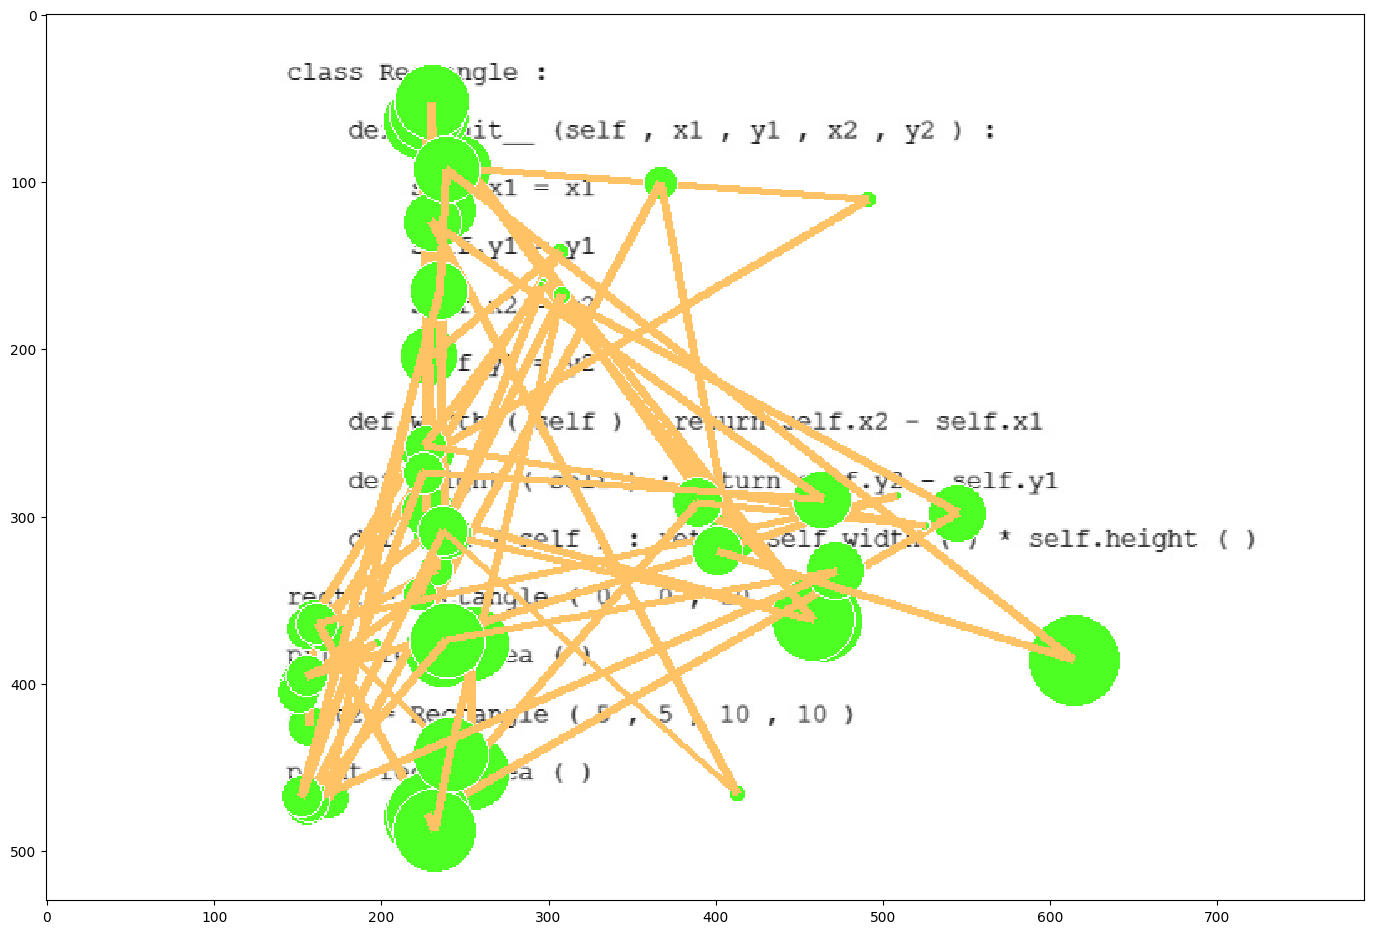

In [50]:
# Disabling the warnings
import warnings
warnings.filterwarnings('ignore')
# generate noise over the correct trial

error_test = correction.error_slope(0.1, data['robot1'].copy())
print(error_test)

# draw the trial with added error
correction.draw_fixation('code_snippet.png', error_test)

  0%|          | 0/25 [00:00<?, ?it/s]

robot: 0     error probability: 0
robot: 0     error probability: 1
robot: 0     error probability: 2
robot: 0     error probability: 3
robot: 0     error probability: 4
robot: 0     error probability: 5
robot: 0     error probability: 6
robot: 0     error probability: 7
robot: 0     error probability: 8
robot: 0     error probability: 9
robot: 0     error probability: 10


  4%|▍         | 1/25 [04:57<1:59:07, 297.83s/it]

robot: 1     error probability: 0
robot: 1     error probability: 1
robot: 1     error probability: 2
robot: 1     error probability: 3
robot: 1     error probability: 4
robot: 1     error probability: 5
robot: 1     error probability: 6
robot: 1     error probability: 7
robot: 1     error probability: 8
robot: 1     error probability: 9
robot: 1     error probability: 10


  8%|▊         | 2/25 [10:30<2:01:56, 318.13s/it]

robot: 2     error probability: 0
robot: 2     error probability: 1
robot: 2     error probability: 2
robot: 2     error probability: 3
robot: 2     error probability: 4
robot: 2     error probability: 5
robot: 2     error probability: 6
robot: 2     error probability: 7
robot: 2     error probability: 8
robot: 2     error probability: 9
robot: 2     error probability: 10


 12%|█▏        | 3/25 [15:29<1:53:31, 309.60s/it]

robot: 3     error probability: 0
robot: 3     error probability: 1
robot: 3     error probability: 2
robot: 3     error probability: 3
robot: 3     error probability: 4
robot: 3     error probability: 5
robot: 3     error probability: 6
robot: 3     error probability: 7
robot: 3     error probability: 8
robot: 3     error probability: 9
robot: 3     error probability: 10


 16%|█▌        | 4/25 [21:51<1:58:24, 338.32s/it]

robot: 4     error probability: 0
robot: 4     error probability: 1
robot: 4     error probability: 2
robot: 4     error probability: 3
robot: 4     error probability: 4
robot: 4     error probability: 5
robot: 4     error probability: 6
robot: 4     error probability: 7
robot: 4     error probability: 8
robot: 4     error probability: 9
robot: 4     error probability: 10


 20%|██        | 5/25 [28:36<2:00:44, 362.24s/it]

robot: 5     error probability: 0
robot: 5     error probability: 1
robot: 5     error probability: 2
robot: 5     error probability: 3
robot: 5     error probability: 4
robot: 5     error probability: 5
robot: 5     error probability: 6
robot: 5     error probability: 7
robot: 5     error probability: 8
robot: 5     error probability: 9
robot: 5     error probability: 10


 24%|██▍       | 6/25 [36:35<2:07:17, 401.96s/it]

robot: 6     error probability: 0
robot: 6     error probability: 1
robot: 6     error probability: 2
robot: 6     error probability: 3
robot: 6     error probability: 4
robot: 6     error probability: 5
robot: 6     error probability: 6
robot: 6     error probability: 7
robot: 6     error probability: 8
robot: 6     error probability: 9
robot: 6     error probability: 10


 28%|██▊       | 7/25 [39:59<1:41:11, 337.33s/it]

robot: 7     error probability: 0
robot: 7     error probability: 1
robot: 7     error probability: 2
robot: 7     error probability: 3
robot: 7     error probability: 4
robot: 7     error probability: 5
robot: 7     error probability: 6
robot: 7     error probability: 7
robot: 7     error probability: 8
robot: 7     error probability: 9
robot: 7     error probability: 10


 32%|███▏      | 8/25 [43:39<1:24:55, 299.75s/it]

robot: 8     error probability: 0
robot: 8     error probability: 1
robot: 8     error probability: 2
robot: 8     error probability: 3
robot: 8     error probability: 4
robot: 8     error probability: 5
robot: 8     error probability: 6
robot: 8     error probability: 7
robot: 8     error probability: 8
robot: 8     error probability: 9
robot: 8     error probability: 10


 36%|███▌      | 9/25 [49:16<1:23:02, 311.42s/it]

robot: 9     error probability: 0
robot: 9     error probability: 1
robot: 9     error probability: 2
robot: 9     error probability: 3
robot: 9     error probability: 4
robot: 9     error probability: 5
robot: 9     error probability: 6
robot: 9     error probability: 7
robot: 9     error probability: 8
robot: 9     error probability: 9
robot: 9     error probability: 10


 40%|████      | 10/25 [54:06<1:16:10, 304.73s/it]

robot: 10     error probability: 0
robot: 10     error probability: 1
robot: 10     error probability: 2
robot: 10     error probability: 3
robot: 10     error probability: 4
robot: 10     error probability: 5
robot: 10     error probability: 6
robot: 10     error probability: 7
robot: 10     error probability: 8
robot: 10     error probability: 9
robot: 10     error probability: 10


 44%|████▍     | 11/25 [57:57<1:05:51, 282.25s/it]

robot: 11     error probability: 0
robot: 11     error probability: 1
robot: 11     error probability: 2
robot: 11     error probability: 3
robot: 11     error probability: 4
robot: 11     error probability: 5
robot: 11     error probability: 6
robot: 11     error probability: 7
robot: 11     error probability: 8
robot: 11     error probability: 9
robot: 11     error probability: 10


 48%|████▊     | 12/25 [1:02:18<59:46, 275.90s/it]

robot: 12     error probability: 0
robot: 12     error probability: 1
robot: 12     error probability: 2
robot: 12     error probability: 3
robot: 12     error probability: 4
robot: 12     error probability: 5
robot: 12     error probability: 6
robot: 12     error probability: 7
robot: 12     error probability: 8
robot: 12     error probability: 9
robot: 12     error probability: 10


 52%|█████▏    | 13/25 [1:07:14<56:23, 281.98s/it]

robot: 13     error probability: 0
robot: 13     error probability: 1
robot: 13     error probability: 2
robot: 13     error probability: 3
robot: 13     error probability: 4
robot: 13     error probability: 5
robot: 13     error probability: 6
robot: 13     error probability: 7
robot: 13     error probability: 8
robot: 13     error probability: 9
robot: 13     error probability: 10


 56%|█████▌    | 14/25 [1:11:37<50:39, 276.27s/it]

robot: 14     error probability: 0
robot: 14     error probability: 1
robot: 14     error probability: 2
robot: 14     error probability: 3
robot: 14     error probability: 4
robot: 14     error probability: 5
robot: 14     error probability: 6
robot: 14     error probability: 7
robot: 14     error probability: 8
robot: 14     error probability: 9
robot: 14     error probability: 10


 60%|██████    | 15/25 [1:16:01<45:23, 272.34s/it]

robot: 15     error probability: 0
robot: 15     error probability: 1
robot: 15     error probability: 2
robot: 15     error probability: 3
robot: 15     error probability: 4
robot: 15     error probability: 5
robot: 15     error probability: 6
robot: 15     error probability: 7
robot: 15     error probability: 8
robot: 15     error probability: 9
robot: 15     error probability: 10


 64%|██████▍   | 16/25 [1:20:34<40:53, 272.56s/it]

robot: 16     error probability: 0
robot: 16     error probability: 1
robot: 16     error probability: 2
robot: 16     error probability: 3
robot: 16     error probability: 4
robot: 16     error probability: 5
robot: 16     error probability: 6
robot: 16     error probability: 7
robot: 16     error probability: 8
robot: 16     error probability: 9
robot: 16     error probability: 10


 68%|██████▊   | 17/25 [1:28:19<44:04, 330.50s/it]

robot: 17     error probability: 0
robot: 17     error probability: 1
robot: 17     error probability: 2
robot: 17     error probability: 3
robot: 17     error probability: 4
robot: 17     error probability: 5
robot: 17     error probability: 6
robot: 17     error probability: 7
robot: 17     error probability: 8
robot: 17     error probability: 9
robot: 17     error probability: 10


 72%|███████▏  | 18/25 [1:34:53<40:47, 349.69s/it]

robot: 18     error probability: 0
robot: 18     error probability: 1
robot: 18     error probability: 2
robot: 18     error probability: 3
robot: 18     error probability: 4
robot: 18     error probability: 5
robot: 18     error probability: 6
robot: 18     error probability: 7
robot: 18     error probability: 8
robot: 18     error probability: 9
robot: 18     error probability: 10


 76%|███████▌  | 19/25 [1:41:56<37:09, 371.61s/it]

robot: 19     error probability: 0
robot: 19     error probability: 1
robot: 19     error probability: 2
robot: 19     error probability: 3
robot: 19     error probability: 4
robot: 19     error probability: 5
robot: 19     error probability: 6
robot: 19     error probability: 7
robot: 19     error probability: 8
robot: 19     error probability: 9
robot: 19     error probability: 10


 80%|████████  | 20/25 [1:55:36<42:11, 506.40s/it]

robot: 20     error probability: 0
robot: 20     error probability: 1
robot: 20     error probability: 2
robot: 20     error probability: 3
robot: 20     error probability: 4
robot: 20     error probability: 5
robot: 20     error probability: 6
robot: 20     error probability: 7
robot: 20     error probability: 8
robot: 20     error probability: 9
robot: 20     error probability: 10


 84%|████████▍ | 21/25 [2:11:38<42:51, 643.00s/it]

robot: 21     error probability: 0
robot: 21     error probability: 1
robot: 21     error probability: 2
robot: 21     error probability: 3
robot: 21     error probability: 4
robot: 21     error probability: 5
robot: 21     error probability: 6
robot: 21     error probability: 7
robot: 21     error probability: 8
robot: 21     error probability: 9
robot: 21     error probability: 10


 88%|████████▊ | 22/25 [2:17:36<27:52, 557.43s/it]

robot: 22     error probability: 0
robot: 22     error probability: 1
robot: 22     error probability: 2
robot: 22     error probability: 3
robot: 22     error probability: 4
robot: 22     error probability: 5
robot: 22     error probability: 6
robot: 22     error probability: 7
robot: 22     error probability: 8
robot: 22     error probability: 9
robot: 22     error probability: 10


 92%|█████████▏| 23/25 [2:31:21<21:15, 637.71s/it]

robot: 23     error probability: 0
robot: 23     error probability: 1
robot: 23     error probability: 2
robot: 23     error probability: 3
robot: 23     error probability: 4
robot: 23     error probability: 5
robot: 23     error probability: 6
robot: 23     error probability: 7
robot: 23     error probability: 8
robot: 23     error probability: 9
robot: 23     error probability: 10


 96%|█████████▌| 24/25 [2:35:41<08:44, 524.52s/it]

robot: 24     error probability: 0
robot: 24     error probability: 1
robot: 24     error probability: 2
robot: 24     error probability: 3
robot: 24     error probability: 4
robot: 24     error probability: 5
robot: 24     error probability: 6
robot: 24     error probability: 7
robot: 24     error probability: 8
robot: 24     error probability: 9
robot: 24     error probability: 10


100%|██████████| 25/25 [2:40:29<00:00, 385.17s/it]


slope Error Statistics:
mean attach: 0.4795665692440928
mean regress: 0.6574958032246103
mean warp: 0.1144323390152835
mean cluster: 0.61944123783092
mean compare: 0.0646738053841533
mean merge: 0.35566354035368897
mean segment: 0.07787974956454428
mean split: 0.20965895754269182
mean stretch: 0.5616125851641176
mean compare fix num: 0.10222607511068671
mean compare line length: 0.08050482557862577
mean fix align: 0.06745354626596142
mean mode of disparities: 0.17326396183274406
mean optimal noise model: 0.4795665692440928
mean optimal slope model: 0.6574958032246103
mean optimal shift model: 0.5785474369665452
mean optimal offset model: 0.4795665692440928


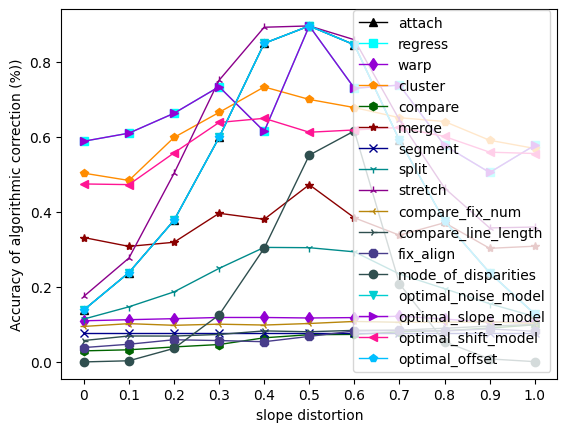

In [51]:
# Running the function
synthetic_error_analysis("slope", 25)